## 서울시 도로노선 정보

In [2]:
import pandas as pd

# 파일 경로 지정
file_path = r"C:\Users\user\Desktop\dataset\서울시 도로노선 정보.csv"

# CSV 파일 불러오기
road = pd.read_csv(file_path)

# 칼럼명 변경
road.columns = ["순번", "노선명(도로명)", "도로종류", "도로기능", "도로규모", "도로폭"]

# 결과 확인
print(road.head())  # 상위 5개 행 출력



   순번 노선명(도로명)  도로종류  도로기능  도로규모     도로폭
0   1      가락로  일반도로  국지도로  소로3류   폭6-8m
1   2   가락로11길  일반도로  국지도로    소로    6m미만
2   3   가락로12길  일반도로  국지도로  소로2류  폭8-10m
3   4   가락로13길  일반도로  국지도로    소로    6m미만
4   5   가락로15길  일반도로  국지도로    소로    6m미만


In [12]:
# 1. 결측치 확인
print(road.isnull().sum())  # 각 컬럼에 대한 결측치 개수 출력
print()

# 도로규모가 "확인불가"인 도로명
확인불가_도로 = road[road["도로규모"] == "확인불가"]

# 도로규모가 결측인 도로명
결측_도로 = road[road["도로규모"].isnull()]

# 결과 출력
print("확인불가인 도로:")
print(확인불가_도로[["노선명(도로명)", "도로규모"]])
# 확인불가인 도로 개수 출력
print(f"\n확인불가인 도로 개수: {확인불가_도로.shape[0]}")
print()


print("\n결측인 도로:")
print(결측_도로[["노선명(도로명)", "도로규모"]])

# 확인불가인 도로 개수 출력
print(f"\n결측인 도로 개수: {결측_도로.shape[0]}")

순번            0
노선명(도로명)      0
도로종류          6
도로기능          0
도로규모          0
도로폭         380
dtype: int64

확인불가인 도로:
       노선명(도로명)  도로규모
126        가양대로  확인불가
211         감초로  확인불가
291       강남순환로  확인불가
308        강변북로  확인불가
309        강변역로  확인불가
...         ...   ...
26343      창포원로  확인불가
26639      청와대로  확인불가
26782      테헤란로  확인불가
26791  테헤란로115길  확인불가
27573    현저고가도로  확인불가

[380 rows x 2 columns]

확인불가인 도로 개수: 380


결측인 도로:
Empty DataFrame
Columns: [노선명(도로명), 도로규모]
Index: []

결측인 도로 개수: 0


확인불가 도로 380개 => 도로폭 결측치 380개

In [13]:
# 2. "무명도로-숫자" 형태의 도로명이 몇 개 있는지 확인
무명도로_count = road[road["노선명(도로명)"].str.match(r"무명도로-\d+")].shape[0]

print(f"무명도로-숫자 형태의 도로명 개수: {무명도로_count}") # 14028

무명도로-숫자 형태의 도로명 개수: 14028


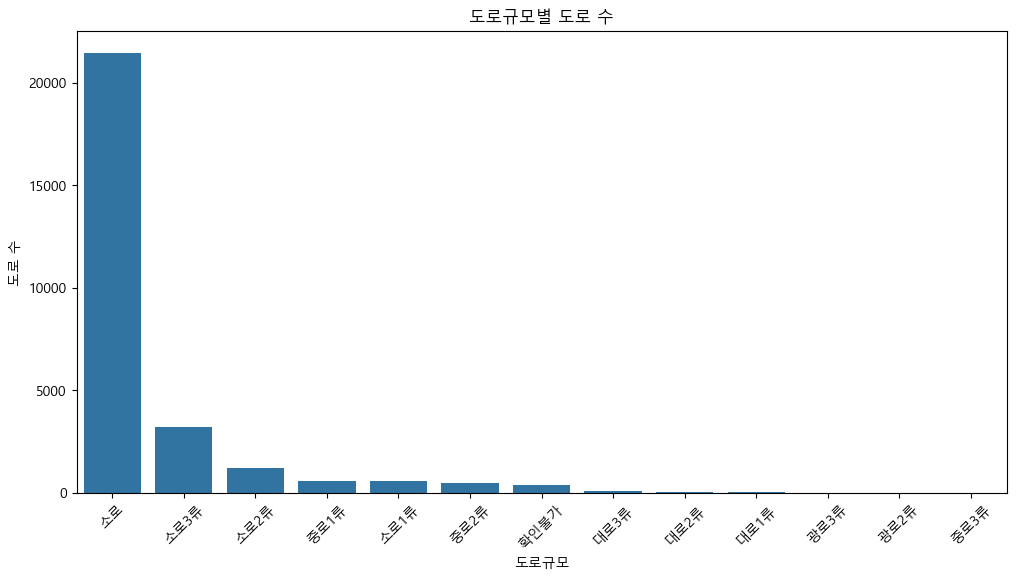

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# 한글 폰트 설정 (Windows에서는 보통 'Malgun Gothic' 사용)
rcParams['font.family'] = 'Malgun Gothic'

# 도로규모별 데이터 개수 확인
road_grouped = road['도로규모'].value_counts().reset_index()
road_grouped.columns = ['도로규모', '개수']

# 도로규모별 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='도로규모', y='개수', data=road_grouped)
plt.title('도로규모별 도로 수')
plt.xlabel('도로규모')
plt.ylabel('도로 수')
plt.xticks(rotation=45)
plt.show()